# Part 2, Lab #4: Image Denoising

Ke Xu 3190110360

### Due April 20th, 2023 11:59 PM CST
#### Logistics and Lab Submission
See the **BlackBoard**.
#### What You Will Need To Know For This Lab

This lab covers:

- Learning Image Desoising.

The submission procedure is provided below:
- You will be provided with a Jupyter Notebook for this lab where you need to implement the provided functions as needed for each question. Follow the instructions provided in this Jupyter Notebook (.ipynb) to implement the required functions. 
- Upload the **PDF** (screen shot) file of your Jupyter Notebook (.ipynb file).
- Your grades and feedbacks will appear on BlackBoard. You will have a chance to re-submit your code, only if you have *reasonable* submissions before the deadline (i.e. not an empty script).

# Problem 1: Mean filter
1. import packages, read the origin image and noised image.

In [8]:
!pip install scikit-image

PSNR:  20.43172867671977


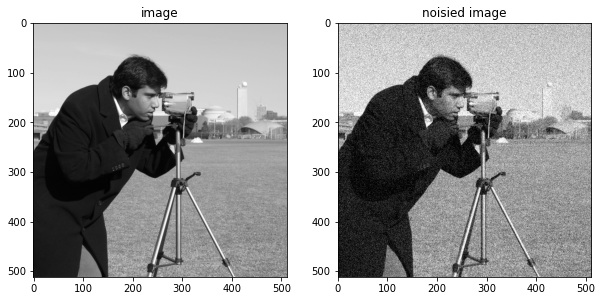

In [9]:
import skimage
from skimage import data, img_as_float
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage import filters
from skimage.morphology import disk

plt.rcParams['image.cmap'] = 'gray'
def imshow_all(*images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax)
        ax.set_title(label)

image = data.camera()
noisy = skimage.util.random_noise(image, mode='gaussian', var=0.01)
imshow_all(image, noisy, titles=['image', 'noisied image'])
mse = np.mean((image-noisy*255)**2)
psnr=20*math.log10(255/math.sqrt(mse))
print('PSNR: ',psnr);

2. Please design a 3\* 3 mean filter for denoising, you can refer from [this link](https://scikit-image.org/docs/stable/api/skimage.filters.rank.html#skimage.filters.rank.mean)

PSNR:  27.708839404755775


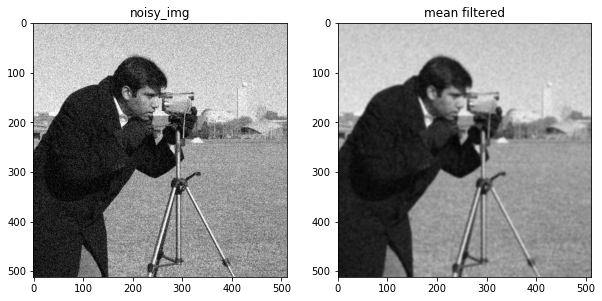

In [10]:
mean_filter = filters.rank.mean(noisy, disk(3))
# skimage.filters.rank.mean(image, footprint, out=None, mask=None, shift_x=False, shift_y=False, shift_z=False)

imshow_all(noisy, mean_filter, titles=['noisy_img', 'mean filtered'])
mse = np.mean((image-mean_filter*255)**2)
psnr=20*math.log10(255/math.sqrt(mse))
print('PSNR: ',psnr)

# Problem 2: Median filter
Please design a 3\*3 median filter, you can refer from [this link](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.median).

PSNR:  26.29821312189769


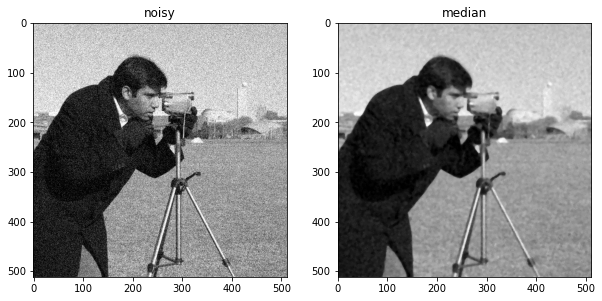

In [11]:
from skimage.filters import median

median_filter = median(noisy,disk(3))
# skimage.filters.median(image, footprint=None, out=None, mode='nearest', cval=0.0, behavior='ndimage')

titles = ['noisy', 'median']
imshow_all(noisy, median_filter, titles=titles)

mse = np.mean((image-median_filter*255)**2)
psnr=20*math.log10(255/math.sqrt(mse))
print('PSNR: ',psnr)

# Problem 3: Gaussian filter
Please design a 3\*3 gaussian filter, standard deviation is 1, you can refer from [this link](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian).

PSNR:  27.174972955193738


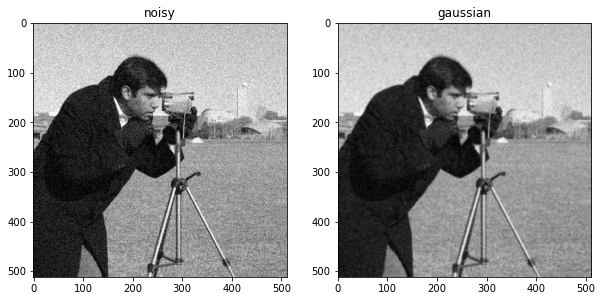

In [12]:
from skimage.filters import gaussian

gaussian_filter = gaussian(noisy,sigma=1) 
# skimage.filters.gaussian(image, sigma=1, output=None, mode='nearest', cval=0, preserve_range=False, truncate=4.0, *, channel_axis=<ChannelAxisNotSet>)

titles = ['noisy', 'gaussian']
imshow_all(noisy, gaussian_filter, titles=titles)

mse = np.mean((image-gaussian_filter*255)**2)
psnr=20*math.log10(255/math.sqrt(mse))
print('PSNR: ',psnr)

# Problem 4: Bilateral filter
Please design a bilateral filter, the standard deviation of range is 0.1, the standard deviation of range is 10. You can refer from [this link](https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.denoise_bilateral).

PSNR:  23.967035548333662


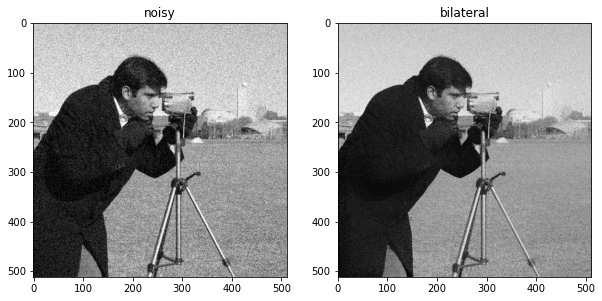

In [13]:
from skimage.restoration import denoise_bilateral
bilateral_filter = denoise_bilateral(noisy,sigma_color=0.1, sigma_spatial=10) 
# skimage.restoration.denoise_bilateral(image, win_size=None, sigma_color=None, sigma_spatial=1, bins=10000, mode='constant', cval=0, *, channel_axis=None)

titles = ['noisy', 'bilateral']
imshow_all(noisy, bilateral_filter, titles=titles)

mse = np.mean((image-bilateral_filter*255)**2)
psnr=20*math.log10(255/math.sqrt(mse))
print('PSNR: ',psnr)

# Problem 5: Custom the filter
Please design a filter so that the PSNR is greater than 22 (except 4 filters above). You can refer from [this link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html#scipy.ndimage.convolve).

PSNR:  26.285364030808246


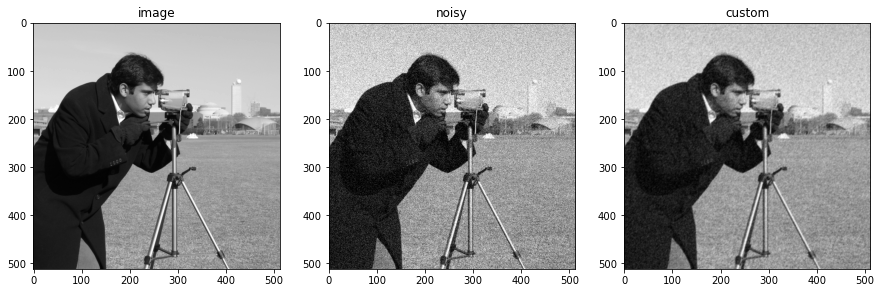

In [14]:
from scipy import ndimage
# 1.custom your kernal by numpy
k = 1/18*np.array([[1,2,3],[3,2,1],[2,3,1]])
# 2.input the noisied image, kernel and other parameters.
filtered = ndimage.convolve(noisy, k)
# scipy.ndimage.convolve(input, weights, output=None, mode='reflect', cval=0.0, origin=0)

titles = ['image', 'noisy', 'custom']
imshow_all(image, noisy, filtered, titles=titles)

mse = np.mean((image-filtered*255)**2)
psnr=20*math.log10(255/math.sqrt(mse))
print('PSNR: ',psnr)